## Block maxima

In [1]:
import warnings
warnings.filterwarnings('ignore')

from pandas_datareader import DataReader
from datetime import datetime

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [9,8]

import numpy as np

In [2]:
start = datetime(2007,1,1)
end = datetime(2009,12,31)

ge = DataReader('GE', 'yahoo',start, end)['Close']
returns = np.log(ge).diff().dropna() # log returns
losses = - returns

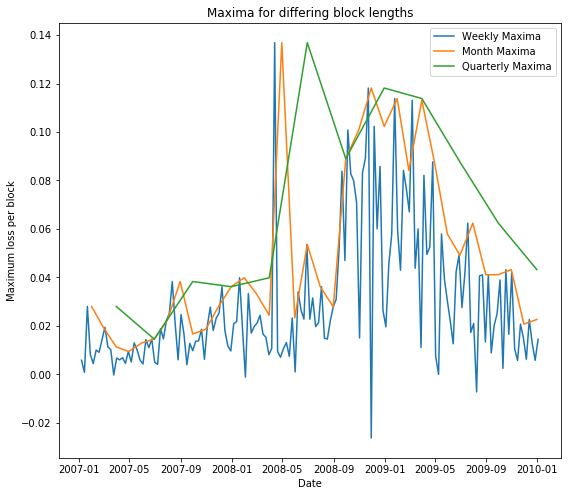

In [3]:
# Resample the data into weekly blocks
weekly_maxima = losses.resample('W').max()

# Resample the data into monthly blocks
monthly_maxima = losses.resample('M').max()

# Resample the data into quarterly blocks
quarterly_maxima = losses.resample('Q').max()

# Plot the resulting weekly, monthly and quarterly maxima
plt.plot(weekly_maxima, label="Weekly Maxima")
plt.plot(monthly_maxima, label="Month Maxima")
plt.plot(quarterly_maxima, label="Quarterly Maxima")

# Create legend and plot
plt.xlabel('Date')
plt.ylabel('Maximum loss per block')
plt.title('Maxima for differing block lengths')
plt.legend()
plt.show()

GE's losses were high and volatile during the crisis. Concentrating on the block maxima provides information about the tail of the loss distribution, which is critical for risk management.

## Extreme events during the crisis

We can use the Generalized Extreme Value (GEV) distribution to examine extreme values in the losses of General Electric (GE) during the financial crisis in 2008 and 2009.

This period coincided with GE's liquidity crisis, and its eventual requirement of an emergency investment of $3 billion from Berkshire Hathaway's Warren Buffet to stave off defaulting on its commercial paper obligations.

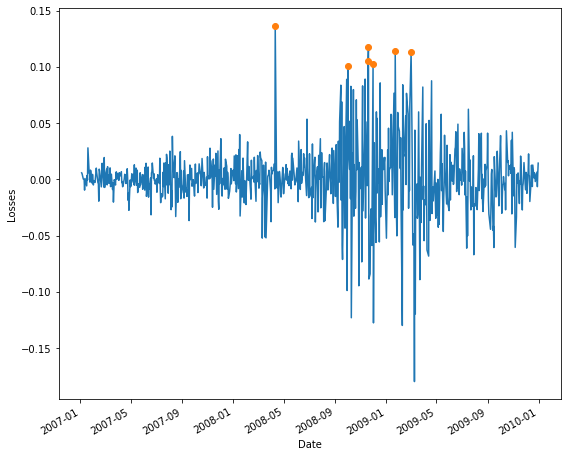

In [4]:
# Plot the log daily losses of GE over the period 2007-2009
losses.plot()

# Find all daily losses greater than 10%
extreme_losses = losses[losses>0.1]

# Scatter plot the extreme losses
extreme_losses.plot(style='o')
plt.xlabel('Date')
plt.ylabel('Losses')
plt.show()

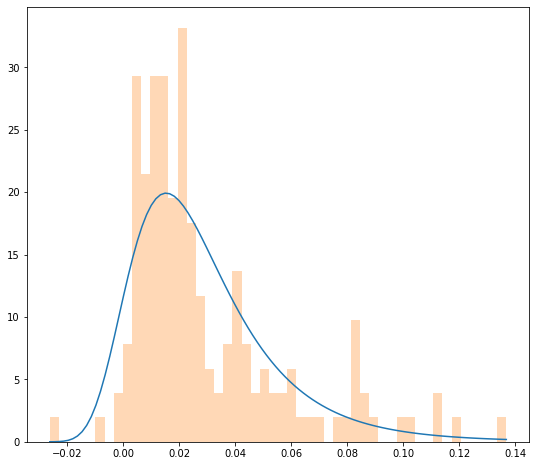

In [5]:
from scipy.stats import genextreme

# Fit extreme distribution to weekly maximum of losses
fitted = genextreme.fit(weekly_maxima)

# Plot extreme distribution with weekly max losses historgram
x = np.linspace(min(weekly_maxima), max(weekly_maxima), 100)
plt.plot(x, genextreme.pdf(x, *fitted))
plt.hist(weekly_maxima, 50, density = True, alpha = 0.3)
plt.show()

We've successfully fit returns data to an extreme value distribution for the financial crisis period. GE would survive the crisis, but would not remain unscathed.

## GEV risk estimation

Suppose that we were holding € 1,000,000 of GE stock on January 1, 2010. We would like to cover the expected maximum losses that might occur over the next week, based upon available data from the previous two years, 2008 - 2009. We assume that maximum weekly losses for GE are distributed according to a Generalized Extreme Value (GEV) distribution.

To model expected losses we'll estimate the CVaR at the 99% confidence level for the GEV distribution, and use it to compute the amount needed in reserve to cover the expected maximum weekly loss over January, 2010.

In [7]:
# Compute the 99% VaR (needed for the CVaR computation)
VaR_99 = genextreme.ppf(0.99, *fitted)

# Compute the 99% CVaR estimate
CVaR_99 = (1 / (1 - 0.99)) * genextreme.expect(lambda x: x, 
           args=(fitted[0],), loc = fitted[1], scale = fitted[2], lb = VaR_99)

# Display the covering loss amount
print("Reserve amount: ", 1000000 * CVaR_99)

Reserve amount:  147797.23449737357


To cover the expected maximum weekly loss you'd need a reserve of roughly 15% of the portfolio value, which is significant. Although the financial crisis was largely over by 2010, new international regulations were implemented requiring higher reserves for banks and institutional investors using both the VaR and CVaR risk measures.